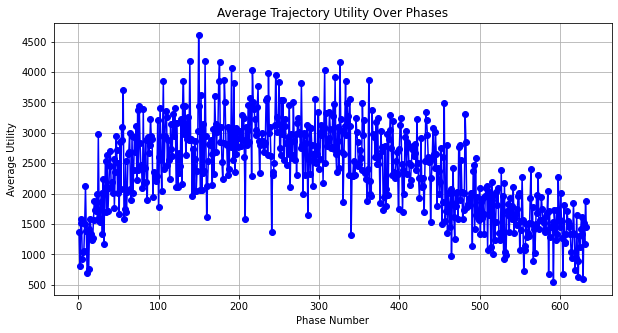

Highest overall utility: 4604.585029745587 at phase 150
Highest utility in the last 100 phases: 2399.3930260824227 at phase 564


In [32]:
import matplotlib.pyplot as plt
import re

def parse_log(file_path):
    phases = []
    utilities = []
    with open(file_path, 'r') as file:
        for line in file:
            # Updated regex to robustly handle positive and negative utilities
            match = re.search(r'After (\d+) phase\(s\), avg trajectory utility = (-?\d+\.\d+)', line)
            if match:
                phase = int(match.group(1))
                utility = float(match.group(2))
                phases.append(phase)
                utilities.append(utility)
    return phases, utilities

def find_highest_values(phases, utilities):
    # Find the highest value overall
    max_index = utilities.index(max(utilities))
    highest_overall = utilities[max_index]
    highest_phase_overall = phases[max_index]

    # Find the highest value in the last 100 phases
    if len(phases) > 100:
        last_100_phases = phases[-100:]
        last_100_utilities = utilities[-100:]
    else:
        last_100_phases = phases
        last_100_utilities = utilities

    max_index_last_100 = last_100_utilities.index(max(last_100_utilities))
    highest_last_100 = last_100_utilities[max_index_last_100]
    highest_phase_last_100 = last_100_phases[max_index_last_100]

    return highest_overall, highest_phase_overall, highest_last_100, highest_phase_last_100

def plot_utilities(phases, utilities):
    plt.figure(figsize=(10, 5))
    plt.plot(phases, utilities, marker='o', linestyle='-', color='b')
    plt.title('Average Trajectory Utility Over Phases')
    plt.xlabel('Phase Number')
    plt.ylabel('Average Utility')
    plt.grid(True)
    plt.show()

def main():
    log_file_path = 'longRun.log'  # Path to the log file
    phases, utilities = parse_log(log_file_path)
    plot_utilities(phases, utilities)

    # Find and print the highest values
    highest_overall, highest_phase_overall, highest_last_100, highest_phase_last_100 = find_highest_values(phases, utilities)
    print(f"Highest overall utility: {highest_overall} at phase {highest_phase_overall}")
    print(f"Highest utility in the last 100 phases: {highest_last_100} at phase {highest_phase_last_100}")

if __name__ == '__main__':
    main()